In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
cols = ['distancia_de_casa', 'distancia_da_utlitma_transacao','razao_para_mediana_do_preco_compra', 'varejistas_repetidos', 'chip_usado', 'senha_usado', 'compra_online', 'fraude']
df = pd.read_csv('/content/card_transdata.csv', names=cols)
df


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,distancia_de_casa,distancia_da_utlitma_transacao,razao_para_mediana_do_preco_compra,varejistas_repetidos,chip_usado,senha_usado,compra_online,fraude
0,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
1,57.87785658389723,0.3111400080477545,1.9459399775518593,1.0,1.0,0.0,0.0,0.0
2,10.829942699255545,0.17559150228166587,1.2942188106198573,1.0,0.0,0.0,0.0,0.0
3,5.091079490616996,0.8051525945853258,0.42771456119427587,1.0,0.0,0.0,1.0,0.0
4,2.2475643282963613,5.60004354707232,0.36266257805709584,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999996,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999997,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999998,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999999,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [106]:
df.describe()

,distancia_de_casa,distancia_da_utlitma_transacao,razao_para_mediana_do_preco_compra,varejistas_repetidos,chip_usado,senha_usado,compra_online,fraude
count,1000001,1000001,1000001,1000001.0,1000001.0,1000001.0,1000001.0,1000001.0
unique,1000001,1000001,1000001,5.0,5.0,5.0,5.0,5.0
top,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,1.0,0.0,0.0,1.0,0.0
freq,1,1,1,823592.0,607141.0,840621.0,607892.0,852726.0


In [107]:
df.isna().sum()

distancia_de_casa                     0
distancia_da_utlitma_transacao        0
razao_para_mediana_do_preco_compra    0
varejistas_repetidos                  0
chip_usado                            0
senha_usado                           0
compra_online                         0
fraude                                0
dtype: int64

Text(0, 0.5, 'number of records')

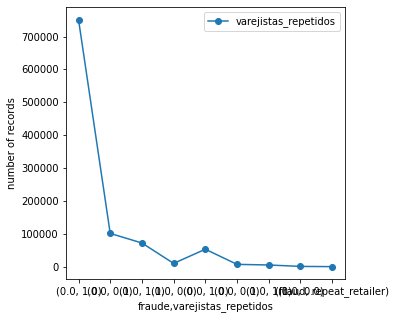

In [108]:
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('fraude')['varejistas_repetidos'].value_counts().plot(legend=True,marker='o',ax=ax)
plt.ylabel("number of records")


Text(0, 0.5, 'número de registros')

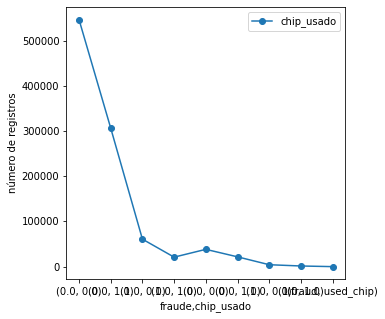

In [109]:
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('fraude')['chip_usado'].value_counts().plot(legend=True,marker='o',ax=ax)
plt.ylabel("número de registros")

Text(0, 0.5, 'número de registros')

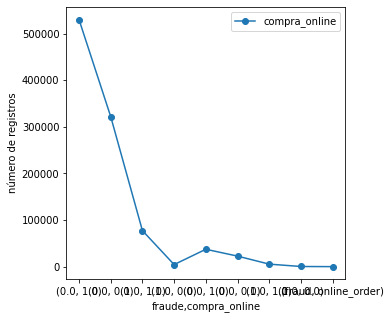

In [110]:
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('fraude')['compra_online'].value_counts().plot(legend=True,marker='o',ax=ax)
plt.ylabel("número de registros")

Text(0, 0.5, 'número de registros')

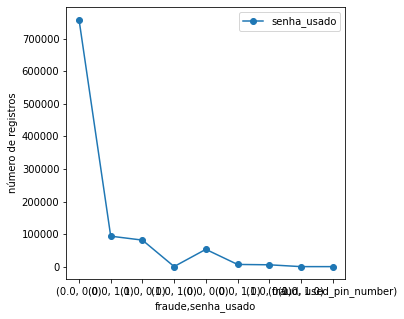

In [111]:
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('fraude')['senha_usado'].value_counts().plot(legend=True,marker='o',ax=ax)
plt.ylabel("número de registros")

In [112]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20,random_state=42, stratify=y)

TypeError: ignored

In [114]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [115]:
def gridSearch(X,y):
    
    param_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth" : np.arange(1,10,2),
    "splitter": ['best', 'random'],
    }
    model = DecisionTreeClassifier(random_state=42)
    gv = GridSearchCV(model,param_grid=param_dict,cv=10)
    gv.fit(X,y)
    return gv.best_score_,gv.best_params_

In [116]:
gridSearch(X_train,y_train)

NameError: ignored

In [117]:
model = DecisionTreeClassifier(random_state=42, 
                               criterion = 'entropy',
                               max_depth =  7, 
                               splitter =  'best')

NameError: ignored

In [118]:
model.fit(X_train,y_train)
prediction = model.predict(X_test)
    

NameError: ignored

In [119]:
print ("Accuracy : ",accuracy_score(y_test,prediction)*100)
print(classification_report(y_test, prediction))

NameError: ignored